In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [21]:
data_name = "transformed_business_im"
# data_name = "dummy_object"
df = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,26,1142,0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,61,214,0,satisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,52,2035,4,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

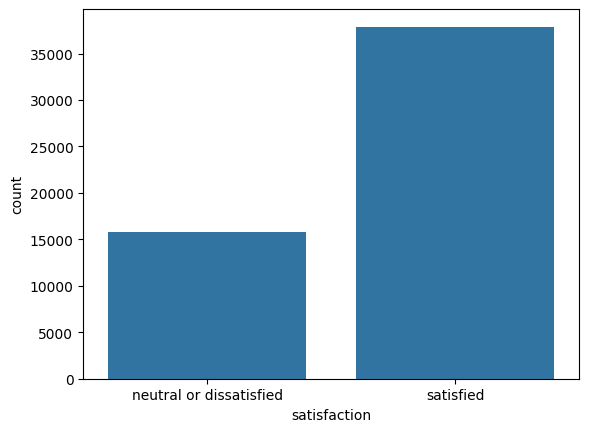

In [22]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

## Train-Test Splitting

In [23]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,25,235,1
1,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,26,1142,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,25,562,11
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,61,214,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,52,2035,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53714,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,1,39,404,0
53715,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,52,280,0
53716,0,0,0,1,0,0,0,0,0,1,...,1,0,0,1,1,0,1,34,526,0
53717,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,23,646,0


In [24]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
53714    neutral or dissatisfied
53715                  satisfied
53716    neutral or dissatisfied
53717                  satisfied
53718                  satisfied
Name: satisfaction, Length: 53719, dtype: object

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (37603, 77) and test set is :(16116, 77)


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.20685694, -0.47094479, -0.53044051, ...,  0.7329855 ,
         1.01603759, -0.39213549],
       [-0.20685694, -0.47094479,  1.88522554, ..., -0.91191218,
        -0.84894383, -0.53324318],
       [-0.20685694, -0.47094479, -0.53044051, ...,  0.26301474,
        -1.03447017, -0.53324318],
       ...,
       [-0.20685694, -0.47094479, -0.53044051, ...,  1.90791242,
         0.78192102, -0.53324318],
       [-0.20685694,  2.12339114, -0.53044051, ..., -1.46021141,
         0.74834959, -0.53324318],
       [-0.20685694, -0.47094479, -0.53044051, ..., -0.59859834,
        -0.71112426, -0.53324318]])

## Set paramiter CV

In [27]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier(criterion='gini', splitter='best',max_features=6,random_state=1234)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_dt.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_DT = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_DT:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.070058 วินาที


In [29]:

#Predict the accuracy of the model
y_pred_dt=model_dt.predict(X_test)

accuracy_DT=accuracy_score(y_pred_dt,y_test)
print(f"Accuracy of Decision Tree is : {round(accuracy_DT*100,2)} % .")

report=classification_report(y_test,y_pred_dt)
print("Classification Report is : \n",report)

Accuracy of Decision Tree is : 92.91 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.88      0.88      4742
              satisfied       0.95      0.95      0.95     11374

               accuracy                           0.93     16116
              macro avg       0.91      0.92      0.91     16116
           weighted avg       0.93      0.93      0.93     16116



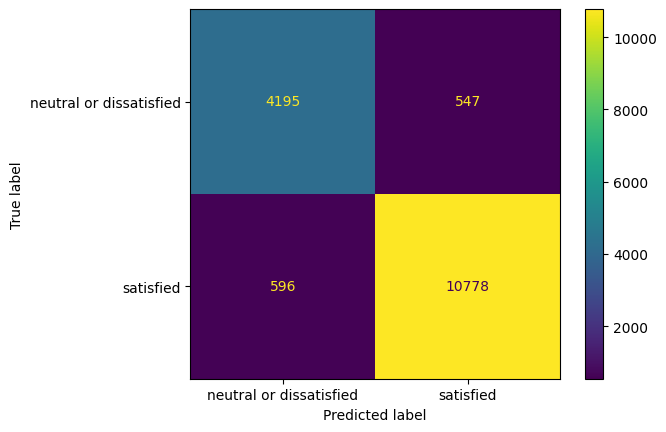

In [30]:
cm_2= confusion_matrix(y_test, y_pred_dt, labels=model_dt.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_dt.classes_)
disp_2.plot()

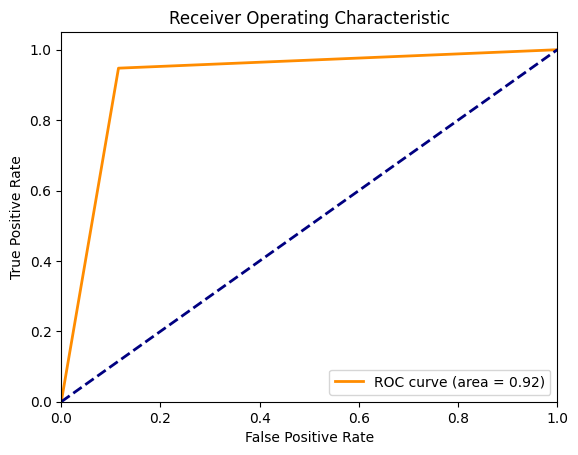

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# แปลง y_test เป็นค่าตัวเลข
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# ทำนายโอกาสของแต่ละ class
y_prob = model_dt.predict_proba(X_test)[:, 1]

# คำนวณ ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# แสดงกราฟ ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [32]:
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_dt = cross_val_score(model_dt, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Decision Tree): {cv_scores_dt}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_dt):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_dt):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_DT = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_DT:.6f} วินาที")


Cross Validation Scores (Decision Tree): [0.92979657 0.93099322 0.9361787  0.93338652 0.94016753 0.9361787
 0.92301556 0.92301556 0.93458317 0.9313921  0.93179099 0.94056641
 0.93697647 0.92697526 0.93335994]
Mean CV Accuracy: 0.9326
Standard Deviation CV Accuracy: 0.0052
เวลาที่ใช้ในการทำ Cross Validation: 0.953764 วินาที


In [33]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_dt.predict(X_train))
test_accuracy = accuracy_score(y_test, model_dt.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 1.0
Test Accuracy: 0.9290766939687267


## Save Model Predic

In [34]:
import pickle
pickle_out = open("../../pipelines/model_DT_business.pkl", mode = "wb")
pickle.dump(model_dt, pickle_out)
pickle_out.close()

with open('../../pipelines/scaler_DT.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [35]:
import pickle
df_t = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
45134,0,0,0,1,0,0,0,0,0,1,...,1,1,0,1,0,1,54,1711,0,satisfied
41944,0,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,1,59,3598,0,satisfied
38397,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,27,1864,0,satisfied
22925,0,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,57,1797,1,satisfied
26043,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,1,37,599,0,satisfied
10845,0,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,28,221,0,satisfied
21768,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,25,1598,0,satisfied
4737,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,48,3552,0,neutral or dissatisfied
26363,0,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,1,25,1080,0,neutral or dissatisfied
31401,0,0,0,1,0,0,0,0,0,1,...,1,1,0,1,0,1,45,3392,0,satisfied


In [36]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
45134,0,0,0,1,0,0,0,0,0,1,...,0,1,1,0,1,0,1,54,1711,0
41944,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,1,59,3598,0
38397,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,27,1864,0
22925,0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0,1,57,1797,1
26043,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,37,599,0
10845,0,1,0,0,0,0,0,1,0,0,...,0,1,1,0,1,0,1,28,221,0
21768,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,1,25,1598,0
4737,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,48,3552,0
26363,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,1,25,1080,0
31401,0,0,0,1,0,0,0,0,0,1,...,0,1,1,0,1,0,1,45,3392,0


In [37]:
y_sam = df_sam.iloc[:,-1]
y_sam


45134                  satisfied
41944                  satisfied
38397                  satisfied
22925                  satisfied
26043                  satisfied
10845                  satisfied
21768                  satisfied
4737     neutral or dissatisfied
26363    neutral or dissatisfied
31401                  satisfied
23769                  satisfied
7120                   satisfied
35487                  satisfied
46611                  satisfied
48262                  satisfied
9296                   satisfied
47977                  satisfied
13777                  satisfied
43564                  satisfied
1961                   satisfied
Name: satisfaction, dtype: object

In [38]:
model = pickle.load(open("../../pipelines/model_DT_business.pkl", 'rb'))
scaler_DT = pickle.load(open("../../pipelines/scaler_DT.pkl", 'rb'))

scaler_new = scaler_DT.transform(X_sam)
preds = model.predict(scaler_new)
print(preds)
accuracy_DT=accuracy_score(preds,y_sam)
print(f"Accuracy of DT is : {round(accuracy_DT*100,2)} % .")

['satisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied'
 'satisfied' 'neutral or dissatisfied' 'neutral or dissatisfied'
 'satisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied'
 'satisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied']
Accuracy of DT is : 100.0 % .
